### About Project

We will to apply Time Series FB-Prophet to build model to predict and forecast the sales of furniture for the next one year i.e. predict future values based on previously observed values. We have a 4-year furniture sales data.

### About Data

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

This dataset consists of daily sales data of various products at a superstore.

### Installing Prophet

#pip install pystan

#pip install fbprophet

#pip install pystan==2.19.1.1 prophet

## Preprocessing the Data

#### 1.Importing the requred

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)  

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#### 2.Importing the table

In [4]:
furniture=pd.read_csv("Super_Store.csv",sep=',',encoding="cp1252")
print(furniture.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

#### 3.Describing data

In [5]:
print("Data Description")
print(furniture.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(furniture.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(furniture.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000  
-----------------------------------------------------------------------------------------------
Number of rows and col

In [6]:
print("Data percentaile")
print(furniture.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(furniture.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
1%       87.600000   2058.000000     4.928000     1.000000     0.000000   
2%      203.200000   2920.000000     6.315200     1.000000     0.000000   
3%      295.600000   6458.800000     7.984800     1.000000     0.000000   
4%      412.200000   7601.000000     8.952000     1.000000     0.000000   
5%      495.000000  10009.000000    10.020000     1.000000     0.000000   
6%      599.200000  10009.000000    12.082400     1.000000     0.000000   
7%      706.000000  10011.000000    13.960000     1.000000     0.000000   
8%      800.600000  10011.000000    14.760000     1.000000     0.000000   
9%      

## EDA process

In [7]:
furniture=furniture.loc[:,['Order Date','Sales']]

In [8]:
print(furniture.head())

   Order Date      Sales
0   11/8/2016   261.9600
1   11/8/2016   731.9400
2  10/11/2015   957.5775
3    6/9/2014    48.8600
4    6/9/2014  1706.1840


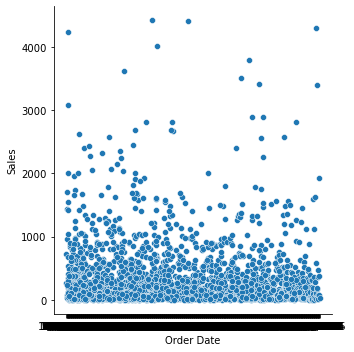

In [9]:
sns.relplot(data=furniture,x="Order Date",y="Sales")
plt.show()

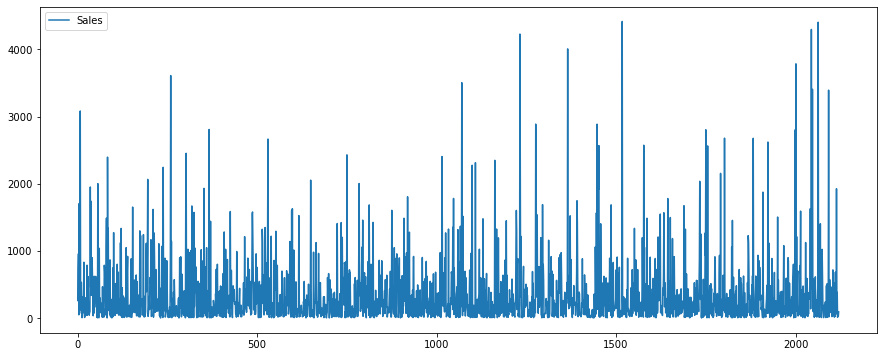

In [10]:
furniture.plot(figsize=(15,6))
plt.show()

In [11]:
furniture["Order Date"] = pd.to_datetime(furniture["Order Date"])

In [12]:
furniture = furniture.sort_values('Order Date')

In [13]:
print(furniture.head())

     Order Date     Sales
1577 2014-01-06  2573.820
1626 2014-01-07    76.728
181  2014-01-10    51.940
150  2014-01-11     9.940
631  2014-01-13   545.940


In [14]:
print(furniture.columns)

Index(['Order Date', 'Sales'], dtype='object')


In [15]:
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

In [16]:
furniture = furniture.groupby('ds')['y'].sum().reset_index()

In [17]:
print(furniture.head())

          ds         y
0 2014-01-06  2573.820
1 2014-01-07    76.728
2 2014-01-10    51.940
3 2014-01-11     9.940
4 2014-01-13   879.939


In [18]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      889 non-null    datetime64[ns]
 1   y       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


## Predection

In [19]:
from prophet import Prophet

In [20]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      889 non-null    datetime64[ns]
 1   y       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


In [21]:
print(furniture.shape)

(889, 2)


#### 1.Training model

In [22]:
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


#### 2.Creating test dates and predecting them

In [23]:
future_dates=furniture_model.make_future_dataframe(periods=365)

In [24]:
print(future_dates)

             ds
0    2014-01-06
1    2014-01-07
2    2014-01-10
3    2014-01-11
4    2014-01-13
...         ...
1249 2018-12-26
1250 2018-12-27
1251 2018-12-28
1252 2018-12-29
1253 2018-12-30

[1254 rows x 1 columns]


In [25]:
prediction=furniture_model.predict(future_dates)

In [26]:
print(prediction.head())

          ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2014-01-06  746.895849 -1023.298051  2858.274220   746.895849   746.895849   
1 2014-01-07  746.917884 -1455.867882  2428.362330   746.917884   746.917884   
2 2014-01-10  746.983988 -1428.957091  2414.960308   746.983988   746.983988   
3 2014-01-11  747.006023 -1531.017300  2432.945478   747.006023   747.006023   
4 2014-01-13  747.050093 -1148.884116  2486.531507   747.050093   747.050093   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0      152.610298            152.610298            152.610298  234.636355   
1     -251.751165           -251.751165           -251.751165 -140.885383   
2      -98.356345            -98.356345            -98.356345   93.195113   
3     -329.458062           -329.458062           -329.458062 -113.515305   
4      -25.285032            -25.285032            -25.285032  234.636355   

   weekly_lower  weekly_upper      yearly  yearly_lower 

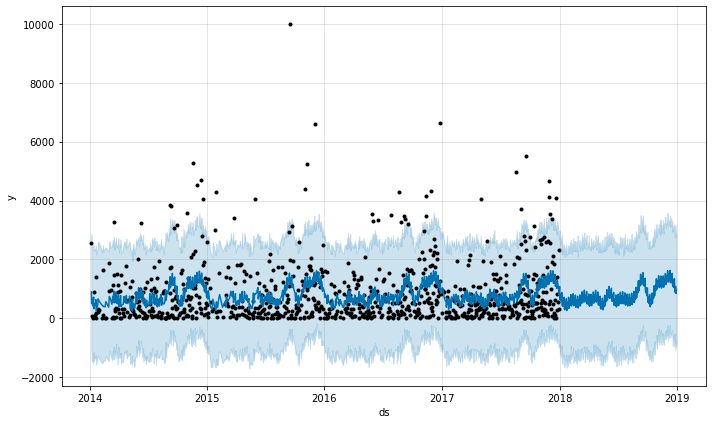

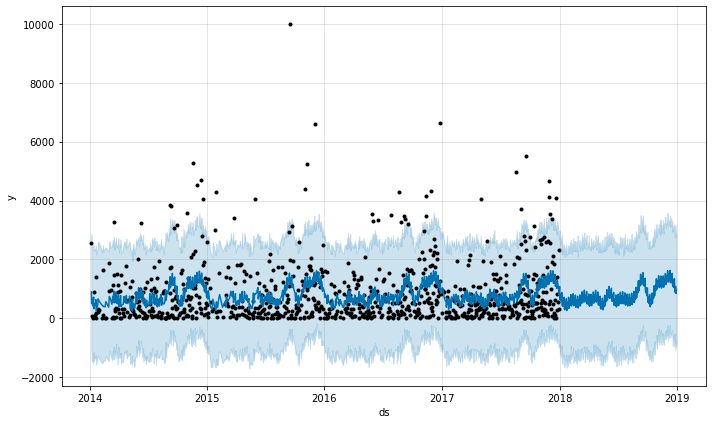

In [27]:
### plot the predicted projection
furniture_model.plot(prediction)

#### Visualize Each Components[Trends,yearly]

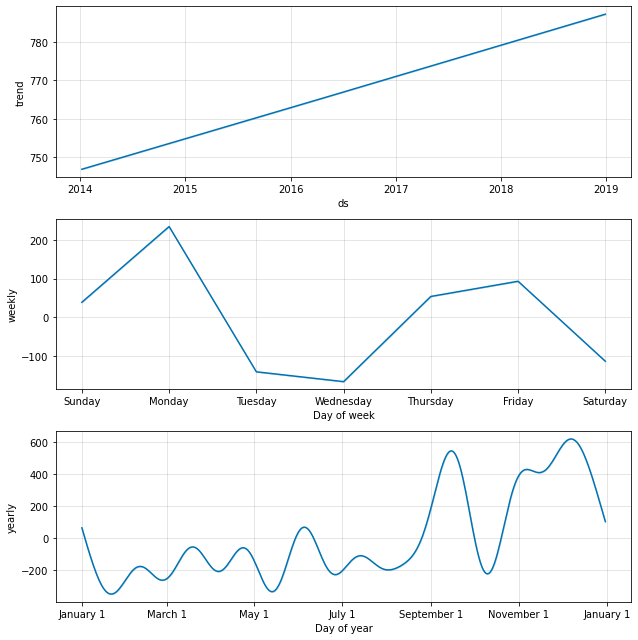

In [28]:
furniture_model.plot_components(prediction)
plt.show()

#### Valudating our madel

In [29]:
from prophet.diagnostics import cross_validation

In [30]:
df_cv = cross_validation(furniture_model, initial='730 days', period='180 days', horizon = '365 days')
print(df_cv.head())

INFO:prophet:Making 2 forecasts with cutoffs between 2016-07-03 00:00:00 and 2016-12-30 00:00:00


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



          ds        yhat   yhat_lower   yhat_upper         y     cutoff
0 2016-07-04  739.259053 -1001.333432  2722.868662  1329.965 2016-07-03
1 2016-07-07  654.408478 -1105.844160  2392.332002   817.278 2016-07-03
2 2016-07-08  586.967017 -1312.095881  2390.530656   662.880 2016-07-03
3 2016-07-09  394.082544 -1552.137188  2239.119608   573.286 2016-07-03
4 2016-07-14  745.122846 -1130.781564  2581.781213   661.686 2016-07-03


In [31]:
from prophet.diagnostics import performance_metrics

In [32]:
df_p = performance_metrics(df_cv)
print(df_p.head())

  horizon            mse        rmse         mae      mape     mdape  \
0 49 days  684550.095252  827.375426  536.256152  7.543316  0.941376   
1 50 days  681968.386835  825.813772  533.819626  7.629804  1.107542   
2 51 days  687419.922021  829.107907  544.264015  7.853989  1.352194   
3 52 days  687917.600008  829.407982  545.541396  7.859494  1.352194   
4 54 days  842577.403918  917.920151  599.660365  7.874258  1.352194   

      smape  coverage  
0  0.934950      0.96  
1  0.951712      0.96  
2  0.991484      0.96  
3  0.994727      0.96  
4  1.022030      0.94  


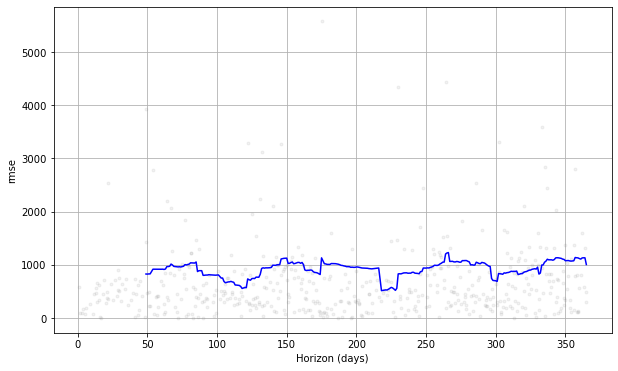

In [33]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### Conclusion :-
Good to see that the sales for furniture  have been linearly increasing over time although and the growth seems slightly stronger.

The worst month for furniture is April. The best month for furniture is December, and the best month for office supplies is November.

There are many time-series analysis we can explore from now on, such as forecast with uncertainty bounds, change point and anomaly detection, forecast time-series with external data source. We have only scratched the surface here. Stay tuned for future works on time-series analysis.